In [64]:
# Section 1 - Run a basic and Simple Regression Model

In [65]:
# note the basic equation is y= ax + b

In [66]:
# Hoston Housing Data discription:https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [50]:
import pandas as pd
import numpy as np
df = pd.read_csv('housing1.csv')
# Print first 10 rows
print(df.head(10))
# Print all column names
print(list(df))
# Select columns
# Select CRIM - per capita crime rate by town & Median value of owner-occupied homes in $1000's
cols = ['median_income','median_house_value']
df_sel = df[cols]
# Drop missing value
df_sel.dropna(inplace = True)

# Statistical details of selected dataset
print(df_sel.describe())

# find correlation coefficient
print('Correlation coefficient:',df_sel['median_income'].corr(df_sel['median_house_value']))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   
5    -122.25     37.85                  52          919           213.0   
6    -122.25     37.84                  52         2535           489.0   
7    -122.25     37.84                  52         3104           687.0   
8    -122.26     37.84                  42         2555           665.0   
9    -122.25     37.84                  52         3549           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401   

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
# Step 2 - Plot and Visualize Data

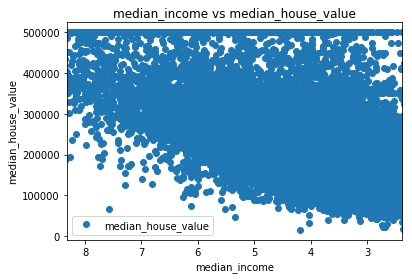

In [51]:
import matplotlib.pyplot as plt  
x = 'median_income'
y = 'median_house_value'
df_sel.plot(x, y, style='o')  
plt.title('median_income vs median_house_value')  
plt.xlabel('median_income')  
plt.ylabel('median_house_value')  
plt.show()

In [37]:
# Practice 1 - Plot 'DIS (weighted distances to five Boston employment centres)' vs 'Median Value'

In [38]:
# Section 2 - Regression plot

41793.84920189622 45085.57670326816


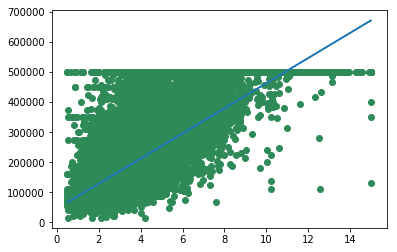

In [56]:
# now calculate and plot best fit line
# convert dataframe column to array
from statistics import mean

xs = np.array(df_sel[x].tolist(), dtype=np.float64)
ys = np.array(df_sel[y].tolist(), dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    a = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - a*mean(xs)
    
    return a, b

a, b = best_fit_slope_and_intercept(xs,ys)


# y = ax+b
print(a,b)

# calculate regression line (predicted y values on regression line)
regression_line = []
for x_value in xs:
    regression_line.append((a*x_value)+b)
plt.scatter(xs,ys,color='seagreen')
plt.plot(xs, regression_line)
plt.show()

In [40]:
# Use the equation above , find out the difference between predicted y and actual y values

In [41]:
# Measure the difference using MSE and RMSE

y_predicted = regression_line

# mean squared error
mse = np.sum((y_predicted - ys)**2)
print('mean squared error is: ',mse)

# root mean squared error
# n is the number of training examples
n = len(y_predicted)
rmse = np.sqrt(mse/n)
print('root mean squared error is: ',rmse)

# r2 score
from sklearn.metrics import r2_score
print(r2_score(xs, ys))

mean squared error is:  269885814833103.53
root mean squared error is:  114349.7403659444
-11546.81948713387


In [42]:
# Section 3 - Now run the same example in Sci-kit learn

In [43]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
# Prepare data
xs2=xs.reshape(-1,1)
ys2=ys.reshape(-1,1)

reg.fit(xs2, ys2)
y_pred = reg.predict(xs2)

In [44]:
# Evaluate results
# mean squared error
mse = np.sum((y_pred - ys2)**2)
print('mean squared error is: ',mse)

# root mean squared error
# n is the number of training examples
n = len(y_pred)
rmse = np.sqrt(mse/n)
print('root mean squared error is: ',rmse)

mean squared error is:  269885814833103.53
root mean squared error is:  114349.7403659444


In [45]:
# Section 4 - What if this is a simple prediction question
# Predict value based on Crime?

In [46]:
# prepare training and testing data
from sklearn import linear_model
reg = linear_model.LinearRegression()

# get total number of data and use onl 30%
n_tot = len(xs2)
print(n_tot)

# use 70 for training
train_x = xs2[:int(n_tot*0.7)]
train_y = ys2[:int(n_tot*0.7)]
test_x = xs2[int(n_tot*0.7):]
test_y = ys2[int(n_tot*0.7):]

# fit data
reg.fit(train_x, train_y)
y_pred_new = reg.predict(test_x)

# note the actual results for the test are test_y

20640


In [48]:
# Evaluate results
# mean squared error
mse = np.sum((y_pred_new - test_y)**2)
print('mean squared error is: ',mse)

# root mean squared error
# n is the number of training examples
n = len(y_pred_new)
rmse = np.sqrt(mse/n)
print('root mean squared error is: ',rmse)

mean squared error is:  93103491865728.33
root mean squared error is:  122611.84987583334


In [20]:
# What do you think? Good results?
# Can you find a better predictor for housing price?
# Based on your findings, can you produce a simple prediction model based on linear regression
# Don't forget to evaluate your result
# Submit your script and provide comments for your results and findings (This is the exercise for the week)

In [57]:
# Bonus question: 
# Use your model for California
# Try their dataset https://www.kaggle.com/camnugent/california-housing-prices
# Any difference? Why?
print('There are differences in the data, the biggest one being that california has significantly more data than Boston.There are not many variables that the CALI and BA datasets shared other than median_income which is simular to LSTAT, and Total_rooms per block which is similar to RM, which is the average number of rooms per dwelling. Based on the MSE and RMSE of Boston and California, both generally showed that income was the best predictor for housing prices. I tried total_rooms and I recieved a RMSE value of 122611.84987583334 which was greater than RMSE value of median_income being 91309.6001.')

There are differences in the data, the biggest one being that california has significantly more data than Boston.There are not many variables that the CALI and BA datasets shared other than median_income which is simular to LSTAT, and Total_rooms per block which is similar to RM, which is the average number of rooms per dwelling. Based on the MSE and RMSE of Boston and California, both generally showed that income was the best predictor for housing prices. I tried total_rooms and I recieved a RMSE value of 122611.84987583334 which was greater than RMSE value of median_income being 91309.6001.
